Supply Chain Management

OVERVIEW:
A Fast Moving Consumer Goods (FMCG) company entered into the instant noodles business two
years back. Their higher management has noticed that there is a mismatch in the demand and
supply. Where the demand is high, supply is pretty low and vice-versa which results in a loss in
inventory cost and ultimately loss to the company. Hence, the higher management wants to
optimize the supply quantity in each and every warehouse in the entire country.
Create a model using : Train dataset
GOALS
The objective of this exercise is to build a model, using historical data that will determine an
optimum weight of the product to be shipped each time from the respective warehouse.
1. Focus on all steps of data science (EDA, data processing, model, evaluation, charts)
2. Highlight any trend in data, deep insight, novel steps that you take
3. Highlight next steps and improvements.
4. Apply 5 to 6 machine learning algorithms and evaluate it using Test dataset .

Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

# Loading the dataset

In [3]:
#loading Training Dataset
train_df=pd.read_csv("C:\\Users\\User1\\Desktop\\supply_train.csv")
train_df.head(5)

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16620 non-null  int64  
 1   Ware_house_ID                 16620 non-null  object 
 2   WH_Manager_ID                 16620 non-null  object 
 3   Location_type                 16620 non-null  object 
 4   WH_capacity_size              16620 non-null  object 
 5   zone                          16620 non-null  object 
 6   WH_regional_zone              16620 non-null  object 
 7   num_refill_req_l3m            16620 non-null  int64  
 8   transport_issue_l1y           16620 non-null  int64  
 9   Competitor_in_mkt             16620 non-null  int64  
 10  retail_shop_num               16620 non-null  int64  
 11  wh_owner_type                 16620 non-null  object 
 12  distributor_num               16620 non-null  int64  
 13  f

In [5]:
test_df=pd.read_csv("C:\\Users\\User1\\Downloads\\supply_test.csv")
test_df.head(5)

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,16621,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,16622,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,...,1,79,31.0,2019.0,5,1,C,2,24,6075
2,16623,WH_116623,EID_66623,Rural,Small,North,Zone 6,3,0,3,...,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,16624,WH_116624,EID_66624,Rural,Mid,West,Zone 4,5,2,2,...,1,255,33.0,2017.0,9,1,A+,3,11,13092
4,16625,WH_116625,EID_66625,Urban,Mid,North,Zone 4,6,0,4,...,0,205,20.0,1999.0,25,0,B,4,26,29071


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    5529 non-null   int64  
 1   Ware_house_ID                 5529 non-null   object 
 2   WH_Manager_ID                 5529 non-null   object 
 3   Location_type                 5529 non-null   object 
 4   WH_capacity_size              5529 non-null   object 
 5   zone                          5529 non-null   object 
 6   WH_regional_zone              5529 non-null   object 
 7   num_refill_req_l3m            5529 non-null   int64  
 8   transport_issue_l1y           5529 non-null   int64  
 9   Competitor_in_mkt             5529 non-null   int64  
 10  retail_shop_num               5529 non-null   int64  
 11  wh_owner_type                 5529 non-null   object 
 12  distributor_num               5529 non-null   int64  
 13  flo

# Data Exploration

In [7]:
train_df.shape

(16620, 25)

In [8]:
train_df.describe()

,Unnamed: 0,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,15953.000000,8760.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000
mean,8309.500000,4.126655,0.780927,3.103129,4983.904994,42.473706,0.096871,0.056017,0.655716,163.521901,28.911490,2009.345320,17.127196,0.306137,3.491095,18.727377,22098.420096
std,4797.925072,2.606241,1.206351,1.147711,1051.032239,16.090000,0.295791,0.229961,0.475149,62.701193,7.842046,7.544672,9.163901,0.460901,1.688614,8.619857,11620.337346
min,0.000000,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2093.000000
25%,4154.750000,2.000000,0.000000,2.000000,4309.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,13057.000000
50%,8309.500000,4.000000,0.000000,3.000000,4856.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,19.000000,22099.000000
75%,12464.250000,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,16619.000000,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


# Data correlation

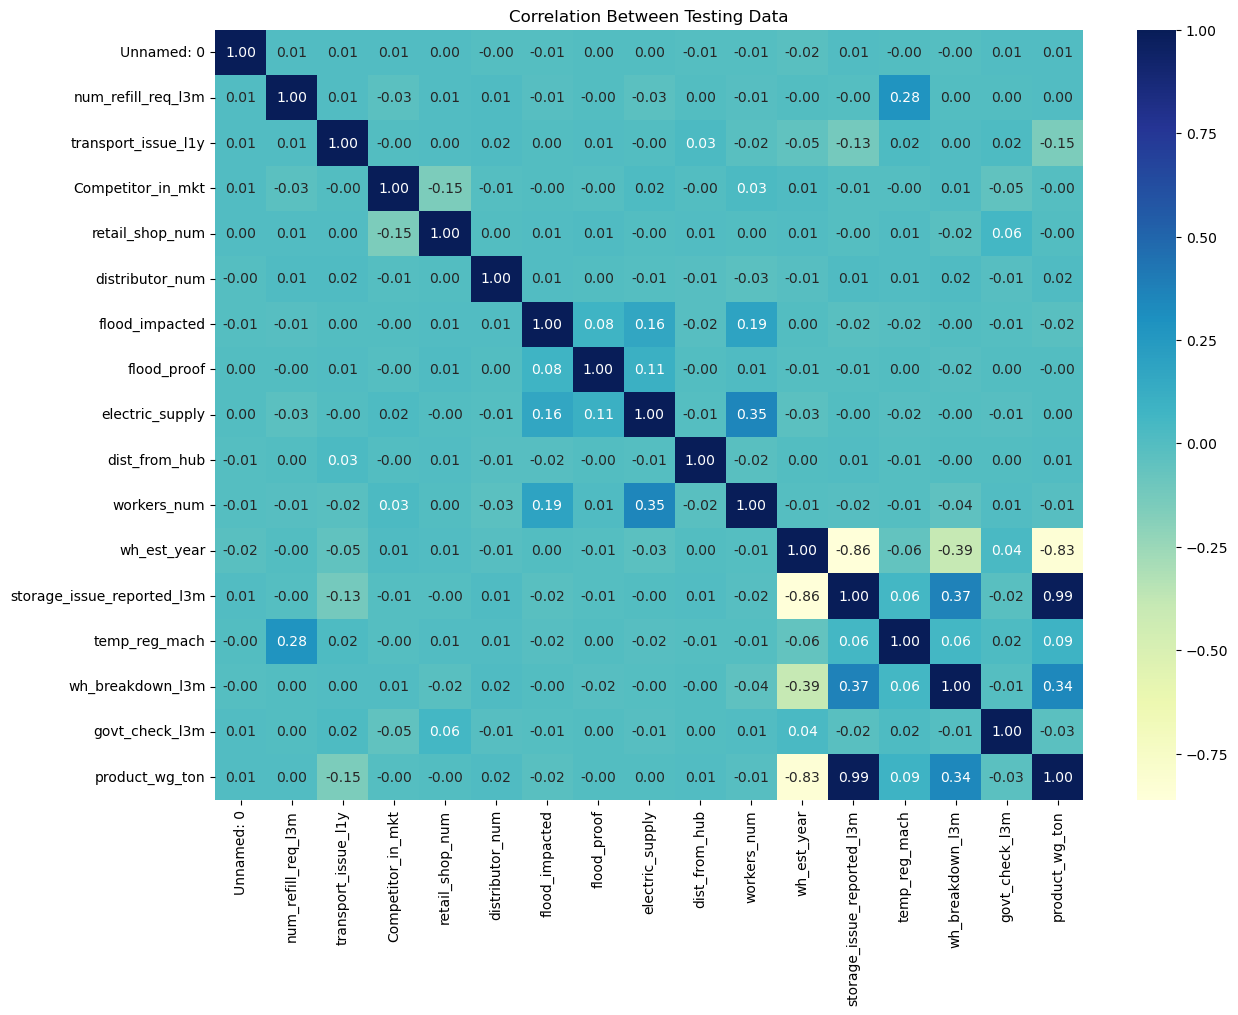

In [9]:
#Data correlation
new_test_df=test_df.select_dtypes(include=['number'])
corr_matrix_2=new_test_df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix_2,annot=True,cmap = 'YlGnBu',fmt='.2f')
plt.title('Correlation Between Testing Data')
plt.show()

In [10]:
#unique values
for feature in train_df.columns:
    unique_values = train_df[feature].unique()
    print(f"Feature: {feature}")
    print(f"Unique values: {unique_values}")
    print(f"Number of unique values: {len(unique_values)}")
    print("-" * 30)

Feature: Unnamed: 0
Unique values: [    0     1     2 ... 16617 16618 16619]
Number of unique values: 16620
------------------------------
Feature: Ware_house_ID
Unique values: ['WH_100000' 'WH_100001' 'WH_100002' ... 'WH_116617' 'WH_116618'
 'WH_116619']
Number of unique values: 16620
------------------------------
Feature: WH_Manager_ID
Unique values: ['EID_50000' 'EID_50001' 'EID_50002' ... 'EID_66617' 'EID_66618'
 'EID_66619']
Number of unique values: 16620
------------------------------
Feature: Location_type
Unique values: ['Urban' 'Rural']
Number of unique values: 2
------------------------------
Feature: WH_capacity_size
Unique values: ['Small' 'Large' 'Mid']
Number of unique values: 3
------------------------------
Feature: zone
Unique values: ['West' 'North' 'South' 'East']
Number of unique values: 4
------------------------------
Feature: WH_regional_zone
Unique values: ['Zone 6' 'Zone 5' 'Zone 2' 'Zone 3' 'Zone 1' 'Zone 4']
Number of unique values: 6
-----------------------

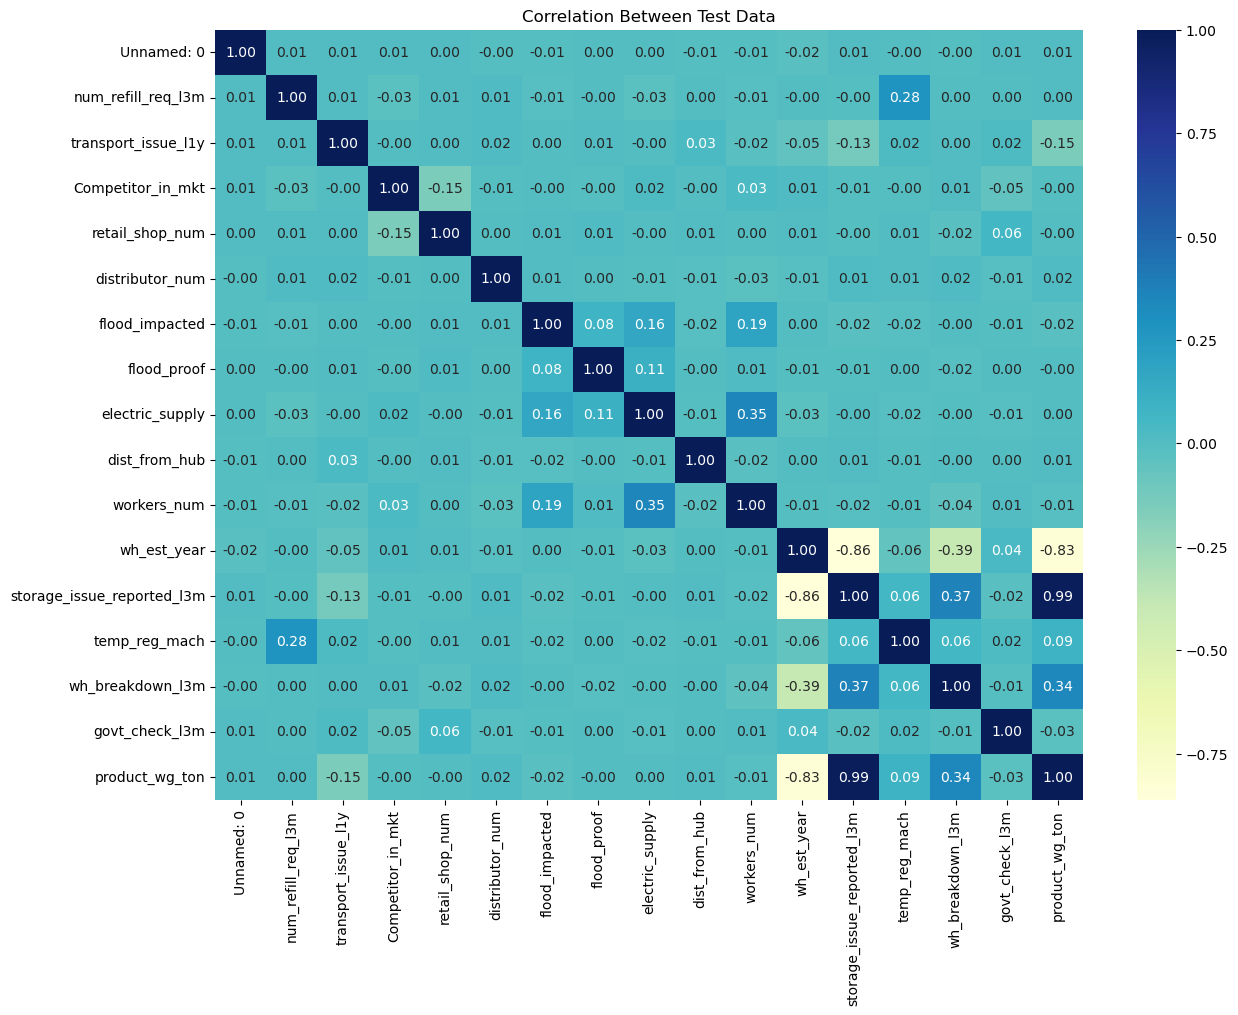

In [11]:
C_matrix_test = test_df.select_dtypes(include=['number']).corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(C_matrix_test, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Between Test Data')
plt.show()

In [12]:
#unique values in test dataset
for feature in test_df.columns:
    unique_values = test_df[feature].unique()
    print(f"Feature: {feature}")
    print(f"Unique values: {unique_values}")
    print(f"Number of unique values: {len(unique_values)}")
    print("-" * 30)

Feature: Unnamed: 0
Unique values: [16621 16622 16623 ... 22147 22148 22149]
Number of unique values: 5529
------------------------------
Feature: Ware_house_ID
Unique values: ['WH_116621' 'WH_116622' 'WH_116623' ... 'WH_122147' 'WH_122148'
 'WH_122149']
Number of unique values: 5529
------------------------------
Feature: WH_Manager_ID
Unique values: ['EID_66621' 'EID_66622' 'EID_66623' ... 'EID_72147' 'EID_72148'
 'EID_72149']
Number of unique values: 5529
------------------------------
Feature: Location_type
Unique values: ['Rural' 'Urban']
Number of unique values: 2
------------------------------
Feature: WH_capacity_size
Unique values: ['Large' 'Small' 'Mid']
Number of unique values: 3
------------------------------
Feature: zone
Unique values: ['North' 'West' 'South' 'East']
Number of unique values: 4
------------------------------
Feature: WH_regional_zone
Unique values: ['Zone 5' 'Zone 6' 'Zone 4' 'Zone 1' 'Zone 2' 'Zone 3']
Number of unique values: 6
--------------------------

# Data Cleaning

In [13]:
train_df.isnull().sum()

Unnamed: 0                         0
Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [14]:
#removing null values
train_df['wh_est_year'].describe()

count    8760.000000
mean     2009.345320
std         7.544672
min      1996.000000
25%      2003.000000
50%      2009.000000
75%      2016.000000
max      2023.000000
Name: wh_est_year, dtype: float64

In [15]:
#replacing null
train = train_df['wh_est_year'].median()
train_df['wh_est_year'].fillna(train,inplace=True)
train_df

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,2009.0,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,2009.0,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,2009.0,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,2009.0,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,16615,WH_116615,EID_66615,Urban,Large,West,Zone 6,3,1,6,...,0,240,19.0,2009.0,14,0,B+,5,23,16094
16616,16616,WH_116616,EID_66616,Urban,Large,North,Zone 5,2,0,2,...,1,164,30.0,2009.0,17,0,B+,6,24,21113
16617,16617,WH_116617,EID_66617,Rural,Large,North,Zone 6,5,0,4,...,1,211,24.0,2003.0,24,1,B,5,29,28117
16618,16618,WH_116618,EID_66618,Rural,Small,West,Zone 6,3,2,3,...,1,119,NaN,2007.0,16,0,A,5,15,21103


In [16]:
# Dropping null values
train_df=train_df.dropna()


In [17]:
train_df.isnull().sum()

Unnamed: 0                      0
Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [18]:
train_df.shape


(15374, 25)

In [19]:
train_df.duplicated().sum()

0

# Cleaning test dataset

In [20]:
test_df.isnull().sum()

Unnamed: 0                         0
Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      210
wh_est_year                     2685
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     206
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [21]:
#removing null values
test_df['wh_est_year'].describe()

count    2844.000000
mean     2009.572785
std         7.473201
min      1996.000000
25%      2003.000000
50%      2010.000000
75%      2016.000000
max      2023.000000
Name: wh_est_year, dtype: float64

In [22]:
#replacing null values with meadian
test = test_df['wh_est_year'].median()
test_df['wh_est_year'].fillna(test,inplace=True)
test_df

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,16621,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,16622,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,...,1,79,31.0,2019.0,5,1,C,2,24,6075
2,16623,WH_116623,EID_66623,Rural,Small,North,Zone 6,3,0,3,...,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,16624,WH_116624,EID_66624,Rural,Mid,West,Zone 4,5,2,2,...,1,255,33.0,2017.0,9,1,A+,3,11,13092
4,16625,WH_116625,EID_66625,Urban,Mid,North,Zone 4,6,0,4,...,0,205,20.0,1999.0,25,0,B,4,26,29071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,8,1,3,...,1,203,28.0,2007.0,22,1,A+,2,4,29138
5525,22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,3,1,3,...,0,170,NaN,2010.0,26,0,C,5,9,33108
5526,22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,7,2,2,...,0,99,22.0,2010.0,20,0,B+,6,4,24072
5527,22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,6,2,4,...,0,220,17.0,2010.0,13,0,B,3,28,15055


In [23]:
# Dropping null values
test_df=test_df.dropna()
test_df.isnull().sum()

Unnamed: 0                      0
Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [24]:
test_df.shape



(5120, 25)

In [25]:
test_df.duplicated().sum()

0

# Feature Engineering (Training Dataset)

In [26]:
train_df.columns

Index(['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID', 'Location_type',
       'WH_capacity_size', 'zone', 'WH_regional_zone', 'num_refill_req_l3m',
       'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num',
       'wh_owner_type', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [27]:
# dropping the unnamed columns
train_df=train_df.drop('Unnamed: 0',axis=1)
train_df.head(2)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,2009.0,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,2009.0,4,0,A,3,17,5074


In [28]:
train_df['WH_regional_zone'].info()

<class 'pandas.core.series.Series'>
Int64Index: 15374 entries, 0 to 16619
Series name: WH_regional_zone
Non-Null Count  Dtype 
--------------  ----- 
15374 non-null  object
dtypes: object(1)
memory usage: 240.2+ KB


In [29]:
#Changing data type of WH_regional_zone
def extract_num(d):
    num=d.split()[-1]
    return int(num)
train_df['WH_regional_zone']=train_df['WH_regional_zone'].apply(extract_num)
train_df['WH_regional_zone'].info()

<class 'pandas.core.series.Series'>
Int64Index: 15374 entries, 0 to 16619
Series name: WH_regional_zone
Non-Null Count  Dtype
--------------  -----
15374 non-null  int64
dtypes: int64(1)
memory usage: 240.2 KB


In [30]:
#Creating a new feature for the product demand
train_df['demand']=train_df['num_refill_req_l3m']*train_df['retail_shop_num']
train_df.head(4)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,demand
0,WH_100000,EID_50000,Urban,Small,West,6,3,1,2,4651,...,91,29.0,2009.0,13,0,A,5,15,17115,13953
1,WH_100001,EID_50001,Rural,Large,North,5,0,0,4,6217,...,210,31.0,2009.0,4,0,A,3,17,5074,0
2,WH_100002,EID_50002,Rural,Mid,South,2,1,0,4,4306,...,161,37.0,2009.0,17,0,A,6,22,23137,4306
3,WH_100003,EID_50003,Rural,Mid,North,3,7,4,2,6000,...,103,21.0,2009.0,17,1,A+,3,27,22115,42000


In [31]:
# Calculate the "supply" as the difference between "product_wg_ton" and "demand"
train_df['supply']=train_df['product_wg_ton']-train_df['demand']
train_df.head(2)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,demand,supply
0,WH_100000,EID_50000,Urban,Small,West,6,3,1,2,4651,...,29.0,2009.0,13,0,A,5,15,17115,13953,3162
1,WH_100001,EID_50001,Rural,Large,North,5,0,0,4,6217,...,31.0,2009.0,4,0,A,3,17,5074,0,5074


# Exploratory Data Analysis

In [32]:
# Find the Most product supplied Zone
most_supplied_zone = train_df['zone'].value_counts().idxmax()
print("Most Supplied Zone:", most_supplied_zone)


Most Supplied Zone: North


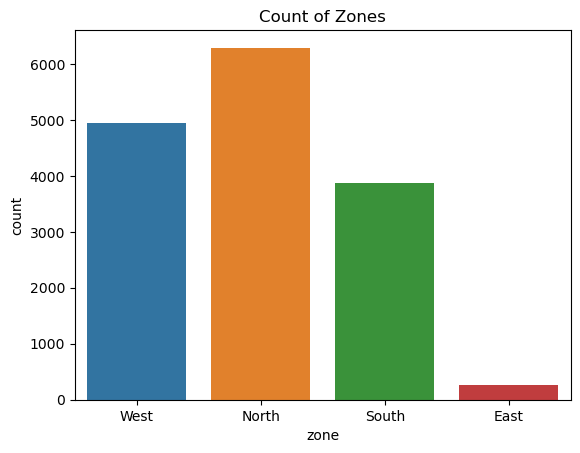

In [33]:
# plotting
sns.countplot(x=train_df.zone)
plt.title("Count of Zones")
plt.show()

North zone has more number of ware houses,that means supply is more in North Zone

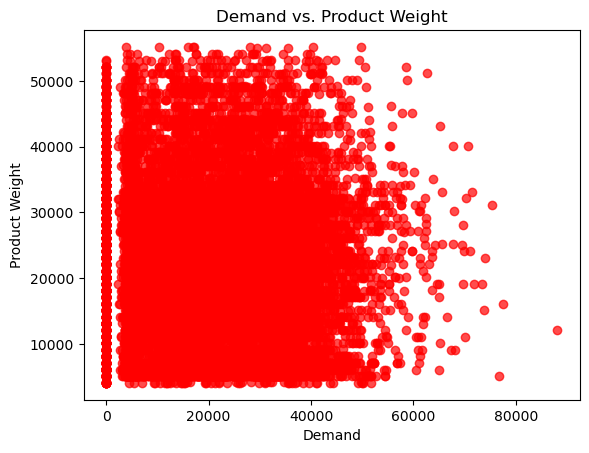

In [34]:
#plotting Demand and Product Weight
plt.scatter(train_df['demand'], train_df['product_wg_ton'], c='red', alpha=0.7)
plt.title('Demand vs. Product Weight')
plt.xlabel('Demand')
plt.ylabel('Product Weight')
plt.show()


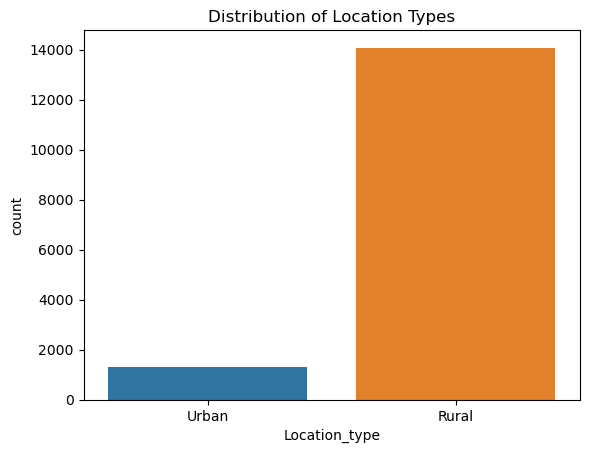

In [35]:
# Bar chart representing distribution of location types
sns.countplot(x='Location_type', data=train_df)
plt.title('Distribution of Location Types')
plt.show()

Text(0, 0.5, 'Value')

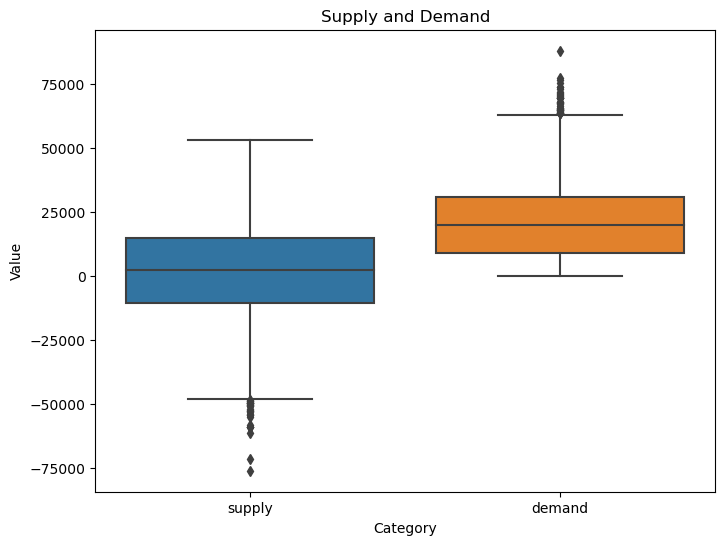

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="variable", y="value", data=pd.melt(train_df[["supply", "demand"]]))
plt.title('Supply and Demand')
plt.xlabel('Category')
plt.ylabel('Value')

By plotting this graph we can see that Demand is greater than supply. Product is highly demanded.

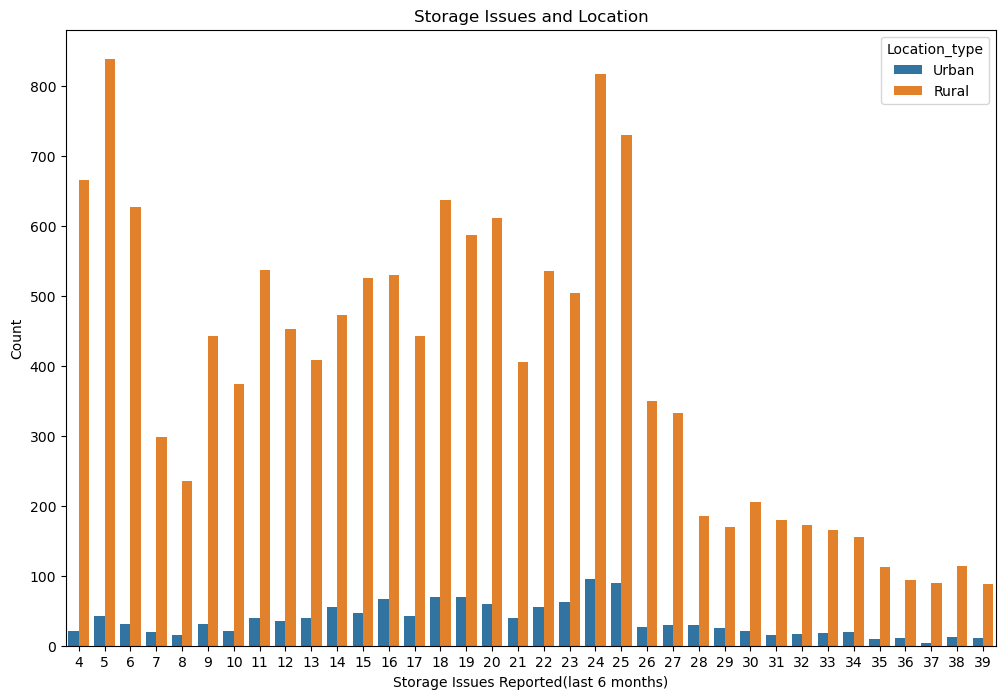

In [37]:
plt.figure(figsize=(12, 8))
sns.countplot(x='storage_issue_reported_l3m', hue='Location_type', data=train_df)
plt.title('Storage Issues and Location')
plt.xlabel('Storage Issues Reported(last 6 months)')
plt.ylabel('Count')
plt.show()

By plotting this graph of the last 6 months storage issue it is clear that the "Rural" areas has reported the highest storage issue

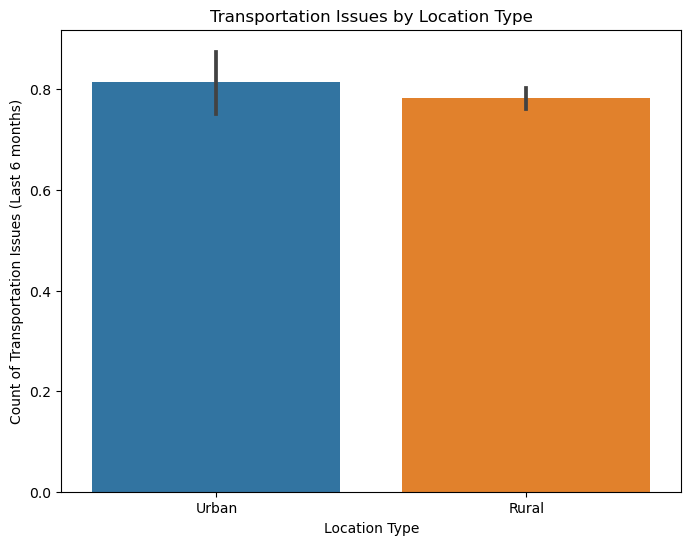

In [38]:
plt.figure(figsize=(8, 6))
sns.barplot(data=train_df, x='Location_type', y='transport_issue_l1y')

plt.title('Transportation Issues by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Count of Transportation Issues (Last 6 months)')
plt.show()

by plotting this graph we can see the transportation issue is slightly higher in urban compared to rural

# DATA PREPROCESSING on training data

In [39]:
#removing columns which are created for EDA
train_df=train_df.drop(['demand','supply',],axis=1)
train_df.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [53]:
# identify categorical values.
categorical_features =train_df.select_dtypes(include="object")
categorical_features.columns

Index(['Location_type', 'WH_capacity_size', 'approved_wh_govt_certificate'], dtype='object')

In [55]:
# dropping less important features
columns_to_drop = ['WH_Manager_ID', 'zone', 'wh_owner_type']
train_df = train_df.drop(columns_to_drop, axis=1, errors='ignore')


In [56]:
train_df.columns

Index(['Ware_house_ID', 'Location_type', 'WH_capacity_size',
       'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'distributor_num',
       'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub',
       'workers_num', 'wh_est_year', 'storage_issue_reported_l3m',
       'temp_reg_mach', 'approved_wh_govt_certificate', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton', 'location encoded',
       'WH_capacity_size encoded', 'encoded_wh_govt_certificate'],
      dtype='object')

In [59]:
def num(d):
    num = ''.join(filter(str.isdigit, str(d)))
    return int(num)

train_df['Ware_house_ID'] = train_df['Ware_house_ID'].astype(str).apply(num)


In [60]:
train_df['Ware_house_ID'].info()

<class 'pandas.core.series.Series'>
Int64Index: 15374 entries, 0 to 16619
Series name: Ware_house_ID
Non-Null Count  Dtype
--------------  -----
15374 non-null  int64
dtypes: int64(1)
memory usage: 240.2 KB


In [61]:
categorical_columns = train_df.select_dtypes(include='object').columns
categorical_columns

Index(['Location_type', 'WH_capacity_size', 'approved_wh_govt_certificate'], dtype='object')

In [62]:
#Label Encoding Categorical variable
label_encoder=LabelEncoder()
train_df['location encoded']=label_encoder.fit_transform(train_df['Location_type'])
train_df['WH_capacity_size encoded']=label_encoder.fit_transform(train_df['WH_capacity_size'])
train_df['encoded_wh_govt_certificate']=label_encoder.fit_transform(train_df['approved_wh_govt_certificate'])
df_1=train_df.drop(['Location_type','WH_capacity_size','approved_wh_govt_certificate'],axis=1)

In [63]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15374 entries, 0 to 16619
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ware_house_ID                15374 non-null  int64  
 1   WH_regional_zone             15374 non-null  int64  
 2   num_refill_req_l3m           15374 non-null  int64  
 3   transport_issue_l1y          15374 non-null  int64  
 4   Competitor_in_mkt            15374 non-null  int64  
 5   retail_shop_num              15374 non-null  int64  
 6   distributor_num              15374 non-null  int64  
 7   flood_impacted               15374 non-null  int64  
 8   flood_proof                  15374 non-null  int64  
 9   electric_supply              15374 non-null  int64  
 10  dist_from_hub                15374 non-null  int64  
 11  workers_num                  15374 non-null  float64
 12  wh_est_year                  15374 non-null  float64
 13  storage_issue_re

# Data preprocessing on Testing data

In [69]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5120 entries, 0 to 5528
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    5120 non-null   int64  
 1   Ware_house_ID                 5120 non-null   int64  
 2   WH_Manager_ID                 5120 non-null   object 
 3   Location_type                 5120 non-null   object 
 4   WH_capacity_size              5120 non-null   object 
 5   zone                          5120 non-null   object 
 6   WH_regional_zone              5120 non-null   int64  
 7   num_refill_req_l3m            5120 non-null   int64  
 8   transport_issue_l1y           5120 non-null   int64  
 9   Competitor_in_mkt             5120 non-null   int64  
 10  retail_shop_num               5120 non-null   int64  
 11  wh_owner_type                 5120 non-null   object 
 12  distributor_num               5120 non-null   int64  
 13  flo

In [72]:
def extract_num(d):
    num = str(d).split('_')[-1]
    return int(num)

test_df['WH_regional_zone'] = test_df['WH_regional_zone'].apply(extract_num)


C:\Users\User1\AppData\Local\Temp\ipykernel_7472\2648324259.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['WH_regional_zone'] = test_df['WH_regional_zone'].apply(extract_num)


In [73]:
test_df['Ware_house_ID']=test_df['Ware_house_ID'].apply(num)

C:\Users\User1\AppData\Local\Temp\ipykernel_7472\2544634766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Ware_house_ID']=test_df['Ware_house_ID'].apply(num)


In [74]:
# dropping unnessary features
columns_to_drop = ['Unnamed: 0', 'WH_Manager_ID', 'zone', 'wh_owner_type']
test_df = test_df.drop(columns_to_drop, axis=1, errors='ignore')
test_df

,Ware_house_ID,Location_type,WH_capacity_size,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,116621,Rural,Large,5,5,0,3,5590,15,0,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,116622,Rural,Large,5,5,0,2,5856,40,0,...,1,79,31.0,2019.0,5,1,C,2,24,6075
2,116623,Rural,Small,6,3,0,3,4803,40,0,...,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,116624,Rural,Mid,4,5,2,2,4784,15,0,...,1,255,33.0,2017.0,9,1,A+,3,11,13092
4,116625,Urban,Mid,4,6,0,4,3699,24,0,...,0,205,20.0,1999.0,25,0,B,4,26,29071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5523,122144,Rural,Small,6,1,2,3,3325,22,0,...,1,160,37.0,2010.0,9,0,B,5,9,10068
5524,122145,Rural,Large,6,8,1,3,5030,46,0,...,1,203,28.0,2007.0,22,1,A+,2,4,29138
5526,122147,Rural,Large,6,7,2,2,5268,64,0,...,0,99,22.0,2010.0,20,0,B+,6,4,24072
5527,122148,Rural,Large,6,6,2,4,4378,32,0,...,0,220,17.0,2010.0,13,0,B,3,28,15055


In [75]:
#Label Encoding Categorical variable
label_encoder=LabelEncoder()
test_df['location encoded']=label_encoder.fit_transform(test_df['Location_type'])
test_df['WH_capacity_size encoded']=label_encoder.fit_transform(test_df['WH_capacity_size'])
test_df['encoded_wh_govt_certificate']=label_encoder.fit_transform(test_df['approved_wh_govt_certificate'])
df_2=test_df.drop(['Location_type','WH_capacity_size','approved_wh_govt_certificate'],axis=1)

In [76]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5120 entries, 0 to 5528
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ware_house_ID                5120 non-null   int64  
 1   WH_regional_zone             5120 non-null   int64  
 2   num_refill_req_l3m           5120 non-null   int64  
 3   transport_issue_l1y          5120 non-null   int64  
 4   Competitor_in_mkt            5120 non-null   int64  
 5   retail_shop_num              5120 non-null   int64  
 6   distributor_num              5120 non-null   int64  
 7   flood_impacted               5120 non-null   int64  
 8   flood_proof                  5120 non-null   int64  
 9   electric_supply              5120 non-null   int64  
 10  dist_from_hub                5120 non-null   int64  
 11  workers_num                  5120 non-null   float64
 12  wh_est_year                  5120 non-null   float64
 13  storage_issue_repo

# splitting train and test data

In [77]:
X_train=df_1.drop('product_wg_ton',axis=1)
y_train=df_1['product_wg_ton']
X_test=df_2.drop('product_wg_ton',axis=1)
y_test=df_2['product_wg_ton']

In [78]:
X_train.head()

,Ware_house_ID,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,location encoded,WH_capacity_size encoded,encoded_wh_govt_certificate
0,100000,6,3,1,2,4651,24,0,1,1,91,29.0,2009.0,13,0,5,15,1,2,0
1,100001,5,0,0,4,6217,47,0,0,1,210,31.0,2009.0,4,0,3,17,0,0,0
2,100002,2,1,0,4,4306,64,0,0,0,161,37.0,2009.0,17,0,6,22,0,1,0
3,100003,3,7,4,2,6000,50,0,0,0,103,21.0,2009.0,17,1,3,27,0,1,1
4,100004,5,3,1,2,4740,42,1,0,1,112,25.0,2009.0,18,0,6,24,0,0,4


In [79]:
y_train.head()

0    17115
1     5074
2    23137
3    22115
4    24071
Name: product_wg_ton, dtype: int64

In [80]:
X_test.head()

,Ware_house_ID,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,location encoded,WH_capacity_size encoded,encoded_wh_govt_certificate
0,116621,5,5,0,3,5590,15,0,0,0,156,30.0,2006.0,24,0,2,5,0,0,0
1,116622,5,5,0,2,5856,40,0,0,1,79,31.0,2019.0,5,1,2,24,0,0,4
2,116623,6,3,0,3,4803,40,0,0,1,70,41.0,2008.0,19,1,5,9,0,2,1
3,116624,4,5,2,2,4784,15,0,0,1,255,33.0,2017.0,9,1,3,11,0,1,1
4,116625,4,6,0,4,3699,24,0,0,0,205,20.0,1999.0,25,0,4,26,1,1,2


In [81]:
y_test.head()

0    30132
1     6075
2    24076
3    13092
4    29071
Name: product_wg_ton, dtype: int64

In [84]:

# Define models dictionary
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'KNeighbors Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor()
}

print("\033[1m\033[3mEvaluation Result \n")

# Iterate over the models dictionary
for regressor_name, regressor in models.items():
    # Fit the regressor
    regressor.fit(X_train, y_train)
    
    # Predict using the regressor
    y_pred = regressor.predict(X_test)
    
    # Calculate evaluation metrics
    score = r2_score(y_pred, y_test)
    mse = mean_squared_error(y_pred, y_test)
    msa = mean_absolute_error(y_pred, y_test)
    
    # Print evaluation results
    print('\033[1m\033[3m', regressor_name, '\n')
    print("mean square error = ", mse)
    print("mean absolute error = ", msa)
    print("r2 score = ", score * 100, '\n')

Evaluation Result 

 Linear Regression 

mean square error =  1933266.964386388
mean absolute error =  1088.5253646047481
r2 score =  98.48899203531542 

 Lasso Regression 

mean square error =  1932614.517796109
mean absolute error =  1088.272497683693
r2 score =  98.48942603006641 

 Ridge Regression 

mean square error =  1933252.0354849515
mean absolute error =  1088.5133655741636
r2 score =  98.48899984941936 

 KNeighbors Regressor 

mean square error =  141997716.46739846
mean absolute error =  9698.4240234375
r2 score =  -975.0745036007045 

 Decision Tree Regressor 

mean square error =  1452990.7234375
mean absolute error =  857.9625
r2 score =  98.88755132079363 

 Random Forest Regressor 

mean square error =  755818.0392604688
mean absolute error =  682.3807734374999
r2 score =  99.4186791989604 

 AdaBoost Regressor 

mean square error =  2412514.3145547896
mean absolute error =  1250.4890459329658
r2 score =  98.0802166054303 



In [94]:
 model_performances[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse
    }

# Finding the best model
best_model = min(model_performances, key=lambda x: model_performances[x]['RMSE'])

# Print the performance metrics for the best model
print('\nPerformance Metrics:')
for model_name, metrics in model_performances.items():
    print(f'\n{model_name}:')
    print(f'Mean Absolute Error (MAE): {metrics["MAE"]:.2f}')
    print(f'Mean Squared Error (MSE): {metrics["MSE"]:.2f}')
    print(f'Root Mean Squared Error (RMSE): {metrics["RMSE"]:.2f}')

# Print the best model and its metrics
print(f'\nBest Model: {best_model}')
print(f'RMSE of the Best Model: {model_performances[best_model]["RMSE"]:.2f}')


Performance Metrics:

Linear Regression:
Mean Absolute Error (MAE): 1088.53
Mean Squared Error (MSE): 1933266.96
Root Mean Squared Error (RMSE): 1390.42

Lasso Regression:
Mean Absolute Error (MAE): 1088.27
Mean Squared Error (MSE): 1932614.52
Root Mean Squared Error (RMSE): 1390.19

Ridge Regression:
Mean Absolute Error (MAE): 1088.51
Mean Squared Error (MSE): 1933252.04
Root Mean Squared Error (RMSE): 1390.41

KNeighbors Regressor:
Mean Absolute Error (MAE): 9698.42
Mean Squared Error (MSE): 141997716.47
Root Mean Squared Error (RMSE): 11916.28

Decision Tree Regressor:
Mean Absolute Error (MAE): 861.19
Mean Squared Error (MSE): 1491725.97
Root Mean Squared Error (RMSE): 1221.36

Random Forest Regressor:
Mean Absolute Error (MAE): 684.02
Mean Squared Error (MSE): 757768.32
Root Mean Squared Error (RMSE): 870.50

AdaBoost Regressor:
Mean Absolute Error (MAE): 1248.72
Mean Squared Error (MSE): 2403922.82
Root Mean Squared Error (RMSE): 1550.46

Best Model: Random Forest Regressor
RMSE

In [96]:
score=r2_score(y_pred,y_test)
mse=mean_squared_error(y_pred,y_test)
msa=mean_absolute_error(y_pred,y_test)
print("\033[1m\033[3mEvaluation Result \n")
print("mean square error = ",mse)
print("mean absolute error = ",msa)
print("r2 score = ",score*100)
    

Evaluation Result 

mean square error =  2403922.821030502
mean absolute error =  1248.7150205042153
r2 score =  98.08416500056236


Random Forest Regressor were the best performing model among those evaluated. It has lower mean absolute error and mean square error, which means it is better in prediction of the target variable. The R² scores for the models were close to 98.13675540117275(ie:98%), which means it will fit the data well.